# **Global Landslides Evaluation & Visualization**

## **Import Libraries**

In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import folium
from folium import plugins
from folium import Marker
from folium.plugins import MarkerCluster, HeatMap

import math
import warnings
warnings.filterwarnings("ignore")

---

## **Getting Know About The Dataset**

In [ ]:
# read dataset to pandas dataframe

df = pd.read_csv('/content/drive/MyDrive/Colab Materials/Land Slide Datset NASA/Global_Landslide_Catalog_Export.csv')

In [ ]:
# display first 5 rows of the dataset

df.head()

source_name  ... latitude
0          AGU  ...  32.5625
1    Oregonian  ...  45.4200
2     CBS News  ... -11.1295
3      Reuters  ...  28.8378
4  The Freeman  ...  10.3336

[5 rows x 31 columns]

In [ ]:
# display last 5 rows

df.tail()

source_name  ...   latitude
11028    The Jakarta Post  ...  -7.853409
11029     Greater Kashmir  ...  33.403080
11030           NBC Daily  ...  26.181606
11031  AGU Landslide Blog  ...  40.886395
11032  The Times of India  ...  17.465630

[5 rows x 31 columns]

In [ ]:
# display shape of the data

df.shape

(11033, 31)

In [ ]:
# display features data types

df.dtypes

source_name                   object
source_link                   object
event_id                       int64
event_date                    object
event_time                   float64
event_title                   object
event_description             object
location_description          object
location_accuracy             object
landslide_category            object
landslide_trigger             object
landslide_size                object
landslide_setting             object
fatality_count               float64
injury_count                 float64
storm_name                    object
photo_link                    object
notes                         object
event_import_source           object
event_import_id              float64
country_name                  object
country_code                  object
admin_division_name           object
admin_division_population    float64
gazeteer_closest_point        object
gazeteer_distance            float64
submitted_date                object
c

---

## **Data Cleaning**

In [ ]:
# drop unwanted columns

df.drop(['event_id','event_time','location_description','event_title','event_description','photo_link',	'notes',	
         'event_import_source'	,'event_import_id','country_code','submitted_date',	'created_date',	'last_edited_date'],
        axis=1,
        inplace=True)

In [ ]:
# print available coumns after drop unwanted columns

for i in df.columns:
  print(i)

source_name
source_link
event_date
location_accuracy
landslide_category
landslide_trigger
landslide_size
landslide_setting
fatality_count
injury_count
storm_name
country_name
admin_division_name
admin_division_population
gazeteer_closest_point
gazeteer_distance
longitude
latitude


In [ ]:
# checking for null values

df.isnull().sum()

source_name                      0
source_link                    846
event_date                       0
location_accuracy                2
landslide_category               1
landslide_trigger               23
landslide_size                   9
landslide_setting               69
fatality_count                1385
injury_count                  5674
storm_name                   10456
country_name                  1562
admin_division_name           1637
admin_division_population     1562
gazeteer_closest_point        1563
gazeteer_distance             1562
longitude                        0
latitude                         0
dtype: int64

In [ ]:
# change data type of 'event_date' Column

df['event_date_cal'] = pd.to_datetime(df['event_date'])

In [ ]:
# split date & time in to separate columns

df['Date'] = pd.to_datetime(df['event_date_cal']).dt.date
df['Time'] = pd.to_datetime(df['event_date_cal']).dt.time

In [ ]:
df.drop(['event_date','event_date_cal'],
        axis=1,
        inplace=True)

In [ ]:
# display the result

df.head(2)

source_name  ...      Time
0         AGU  ...  00:00:00
1   Oregonian  ...  02:00:00

[2 rows x 19 columns]

---

## **Exploratory Data Analysis & Visualization**

## **Event Reported Source**

In [ ]:
Reported_source = pd.DataFrame(df['source_name'].value_counts().head(15)).reset_index()
Reported_source.columns = ['Source Name','Reported Count']
Reported_source

Source Name  Reported Count
0                             Oregon DOT             768
1                        maps.google.com             104
2                      thehimalayantimes              75
3                         news.xinhuanet              74
4                      newsinfo.inquirer              71
5                         thejakartapost              59
6                             ibnlive.in              57
7                         Times of India              47
8                       The Jakarta Post              46
9                    The Himalayan Times              43
10  articles.timesofindia.indiatimes.com              42
11                         Seattle Times              41
12                                  laht              40
13                             The Hindu              38
14                              GMA News              38

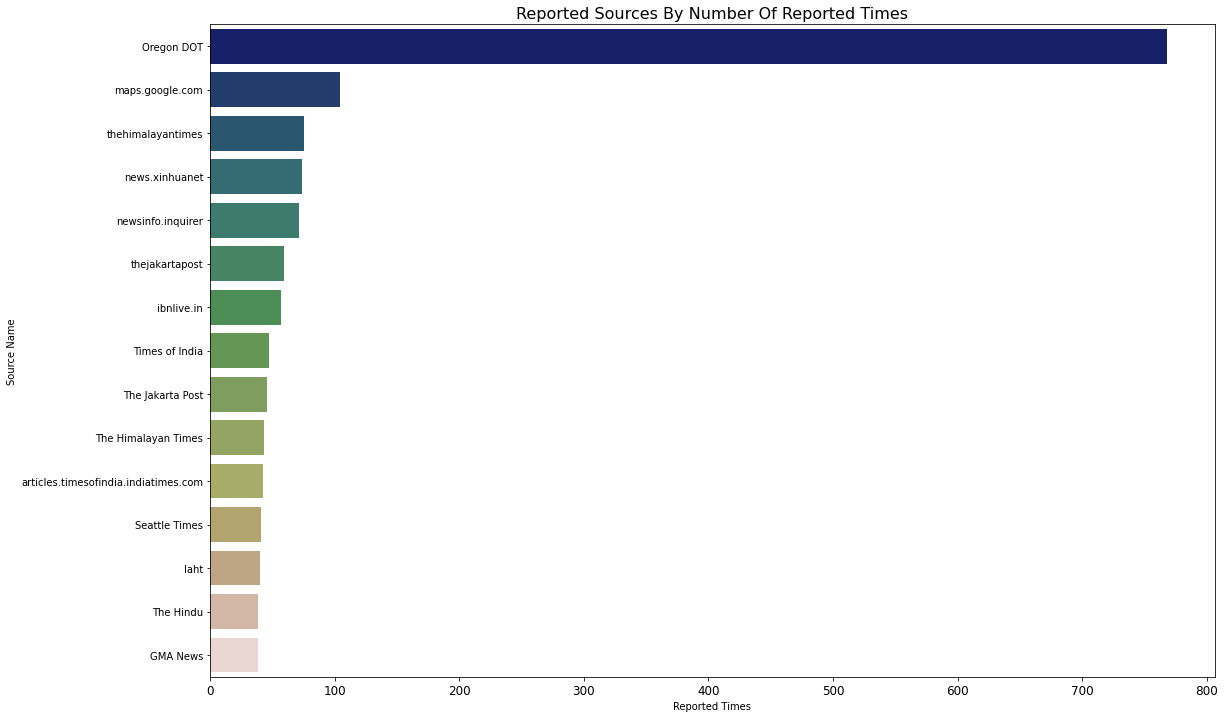

In [ ]:
# visualize source reported times

plt.figure(figsize=(18,12))
sns.barplot(x="Reported Count", y="Source Name", 
            data=Reported_source,
            palette="gist_earth")

plt.xticks(size=12)
plt.title('Reported Sources By Number Of Reported Times',size=16)
plt.xlabel('Reported Times',size=10)
plt.show()

> ## *Origon DOT Have Reported Huge Number Of Events During This Time Period ( 1988 - 2017 )*

## **Geospatial Visualization Of Globally Events**

---

> ### **Open Streat Map Style** 

In [ ]:
# Create the map
map_1 = folium.Map(location=[51.1657,10.4515], tiles='cartodbpositron', zoom_start=2) 

mc1 = MarkerCluster()

for idx, row in df.iterrows(): 

     if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):

        mc1.add_child(Marker(location=[row['latitude'], row['longitude']]))

#add child to the map                                     
map_1.add_child(mc1)

# Display the map
map_1

> ### **Heat Map Style**

In [ ]:
# Create the map
map_2 = folium.Map(location=[51.1657,10.4515], zoom_start=2) 

# List comprehension to make out list of lists
heat_data = [[row['latitude'],row['longitude']] for index, row in df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(map_2)

minimap = plugins.MiniMap()
map_2.add_child(minimap)


# Display the map
map_2


> ## **Accoring to the above maps we can determine that lot of land slide events happend in ,** 
- Indial Ocean  
- North America
- South America

---

## **Events By Years**

In [ ]:
# max available date

df['Date'].max()

datetime.date(2017, 9, 28)

In [ ]:
# minamum available data 

df['Date'].min()

datetime.date(1988, 11, 7)

In [ ]:
# split year from date
df['year'] = pd.to_datetime(df['Date']).dt.year

In [ ]:
# varify the resuly

df.head(2)

source_name  ...  year
0         AGU  ...  2008
1   Oregonian  ...  2009

[2 rows x 20 columns]

In [ ]:
#group by yeras
gr_by_years = pd.DataFrame(df.groupby('year')['source_name'].count().reset_index())

#change columns names
gr_by_years.columns = ['year','Occured_Events']
gr_by_years

year  Occured_Events
0   1988               1
1   1993               1
2   1995               1
3   1996               2
4   1997              10
5   1998              12
6   2003               2
7   2004               1
8   2005               2
9   2006              13
10  2007             412
11  2008             553
12  2009             423
13  2010            1536
14  2011            1324
15  2012             794
16  2013            1132
17  2014            1035
18  2015            1341
19  2016            1183
20  2017            1255

Text(0.5, 1.0, 'Occured Events By Years')

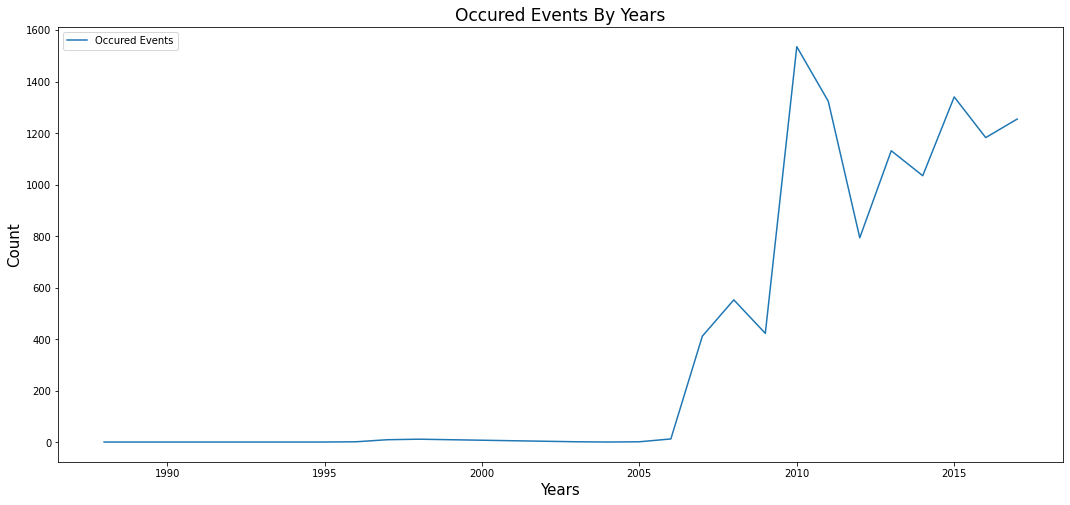

In [ ]:
# Visualize Occured Events By Years

fig, ax = plt.subplots(1, 1, figsize=[18, 8])
ax.plot(gr_by_years['year'], gr_by_years['Occured_Events'])

plt.xlabel('Years',size=15)
plt.ylabel('Count',size=15)

plt.legend(['Occured Events'], loc=2)
ax.set_title('Occured Events By Years',size=17)

## **Events By Months**

In [ ]:
# split month from date
df['month'] = pd.to_datetime(df['Date']).dt.month

#check the result
df.head(2)

source_name                                        source_link  ...  year month
0         AGU  https://blogs.agu.org/landslideblog/2008/10/14...  ...  2008     8
1   Oregonian  http://www.oregonlive.com/news/index.ssf/2009/...  ...  2009     1

[2 rows x 21 columns]

In [ ]:
#group by months
gr_by_months = pd.DataFrame(df.groupby('month')['source_name'].count().reset_index())

#change columns names
gr_by_months.columns = ['month','Occured_Events']
gr_by_months

month  Occured_Events
0       1             968
1       2             805
2       3             987
3       4             843
4       5             796
5       6             988
6       7            1294
7       8            1149
8       9             887
9      10             736
10     11             643
11     12             937

Text(0.5, 1.0, 'Occured Events By Months')

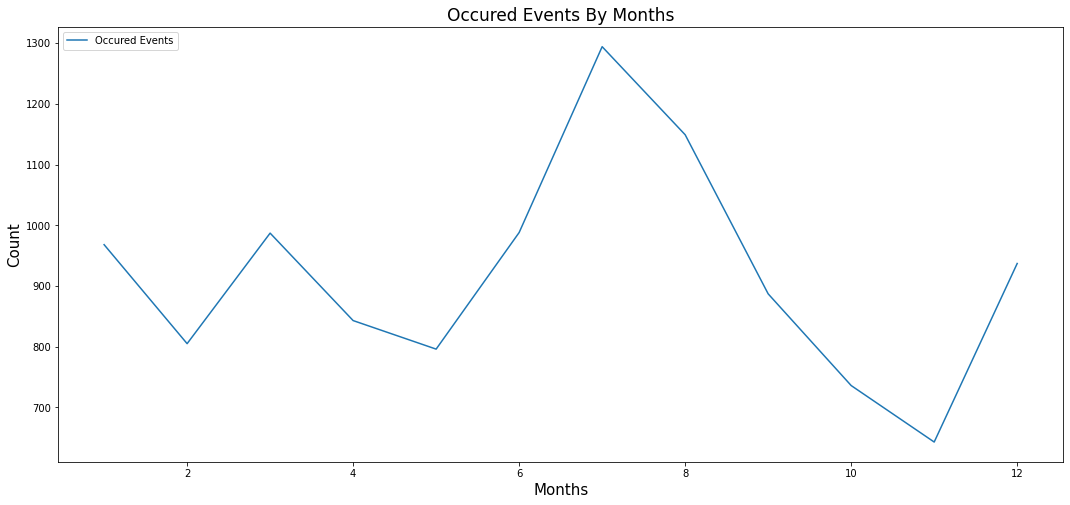

In [ ]:
# Visualize Event occured Count by months

fig, ax = plt.subplots(1, 1, figsize=[18, 8])
ax.plot(gr_by_months['month'], gr_by_months['Occured_Events'])

plt.xlabel('Months',size=15)
plt.ylabel('Count',size=15)

plt.legend(['Occured Events'], loc=2)
ax.set_title('Occured Events By Months',size=17)

> ## *We Can See There Are Most Event Occured During 3 Quater Of The year*

### Events In 2010

In [ ]:
# Filter events in 2010

year_2010 = pd.DataFrame(df[(df['year'] == 2010)])
year_2010

source_name  ... month
4         The Freeman  ...    10
56                CNN  ...     1
58              globo  ...     4
59              E-Pao  ...     7
60               Dawn  ...     8
...               ...  ...   ...
9823    tv.repubblica  ...    10
9825            9wsyr  ...     9
9827             dawn  ...     7
9857        fresnobee  ...     1
9858  maps.google.com  ...     4

[1536 rows x 21 columns]

### Visualize Events Occured In 2010 In Gepspatial Map

In [ ]:
# Create the map
map_3 = folium.Map(location=[51.1657,10.4515], zoom_start=2) 

# List comprehension to make out list of lists
heat_data2 = [[row['latitude'],row['longitude']] for index, row in year_2010.iterrows()]

# Plot it on the map
HeatMap(heat_data2).add_to(map_3)

# Display the map
map_3

### **In 2010 More Events Occured In Indian Ocean**

### Events In 2017

In [ ]:
year_2017 = pd.DataFrame(df[(df['year'] == 2017)])
year_2017

source_name  ... month
13                    Vietnamnet  ...     7
42                          WYMT  ...     5
53                    Vietnamnet  ...     7
73                   Nation News  ...     6
77                          KMPH  ...     1
...                          ...  ...   ...
11027  St. Maries Gazette Record  ...     3
11028           The Jakarta Post  ...     4
11029            Greater Kashmir  ...     3
11031         AGU Landslide Blog  ...     4
11032         The Times of India  ...     3

[1255 rows x 21 columns]

### **Visualize Events Occured In 2017 In Gepspatial Map**

In [ ]:
# Create the map
map_4 = folium.Map(location=[51.1657,10.4515], zoom_start=2) 

# List comprehension to make out list of lists
heat_data3 = [[row['latitude'],row['longitude']] for index, row in year_2017.iterrows()]

# Plot it on the map
HeatMap(heat_data3).add_to(map_4)

# Display the map
map_4

### * In 2017 Most Events Occured In Indian Ocean & Also Have Higher Count In North and South America*

## **Events By Category**

landslide              7648
mudslide               2100
rock_fall               671
complex                 232
debris_flow             194
other                    68
unknown                  38
riverbank_collapse       37
snow_avalanche           15
translational_slide       9
earth_flow                7
lahar                     7
creep                     5
topple                    1
Name: landslide_category, dtype: int64


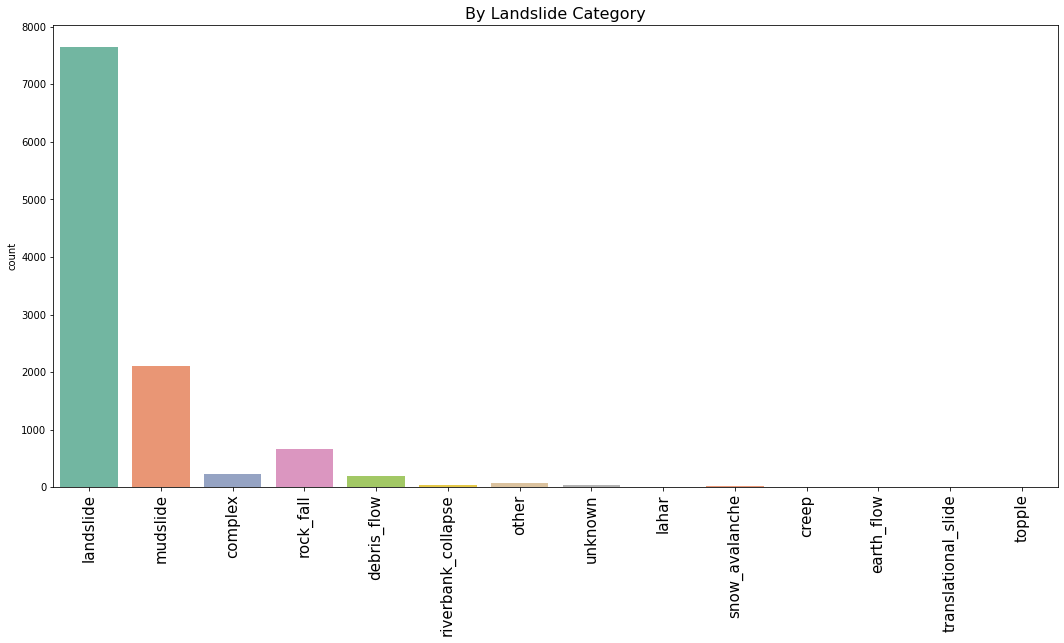

In [ ]:
def event_by_category():

  #print value count
  print(df['landslide_category'].value_counts()) 

  #print in countplot graph
  plt.figure(figsize=(18,8.5))
  sns.countplot(df['landslide_category'],palette='Set2')
  plt.xticks(rotation='vertical',size=15)
  plt.title('By Landslide Category',size=16)
  plt.xlabel('',size=10)
  plt.show()


event_by_category()

## **Events By Size**

medium          6551
small           2767
unknown          851
large            750
very_large       102
catastrophic       3
Name: landslide_size, dtype: int64


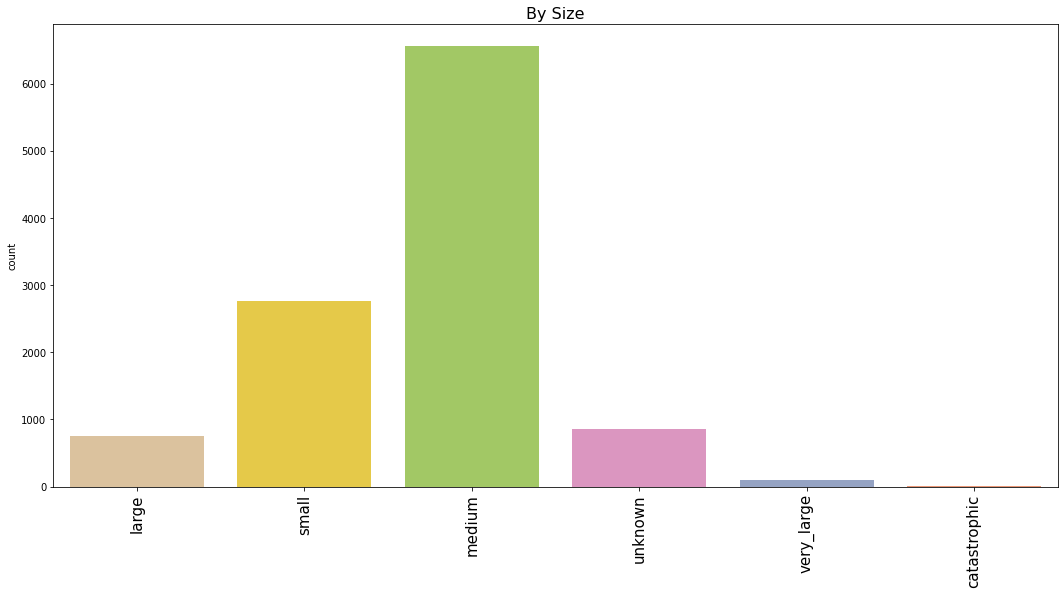

In [ ]:
def event_by_size():

  #print value count
  print(df['landslide_size'].value_counts()) 

  #print in countplot graph
  plt.figure(figsize=(18,8.5))
  sns.countplot(df['landslide_size'],palette='Set2_r')
  plt.xticks(rotation='vertical',size=15)
  plt.title('By Size',size=16)
  plt.xlabel('',size=10)
  plt.show()


event_by_size()

### **Very Large Events Geospatial Visualization**

In [ ]:
size_large = pd.DataFrame(df[(df['landslide_size'] == 'very_large')])
size_large

source_name  ... month
65     Google Earth  ...     1
167    Local News 8  ...     7
198       Brudirect  ...     8
252        LA Times  ...     5
355       NewsFlare  ...     8
...             ...  ...   ...
10459  The Watchers  ...     2
10622           CNN  ...     2
10783    The Bubble  ...     1
10845      CBC News  ...    10
11012     FloodList  ...     3

[102 rows x 21 columns]

In [ ]:
map_5 = folium.Map(location=[51.1657,10.4515], zoom_start=2) 

# List comprehension to make out list of lists
heat_data4 = [[row['latitude'],row['longitude']] for index, row in size_large.iterrows()]

# Plot it on the map
HeatMap(heat_data4).add_to(map_5)

# Display the map
map_5

## **Events By Settings Type**

unknown             6291
above_road          3104
natural_slope        531
urban                264
below_road           199
mine                 157
above_river          149
deforested_slope      53
other                 50
bluff                 48
retaining_wall        48
burned_area           28
engineered_slope      22
above_coast           20
Name: landslide_setting, dtype: int64


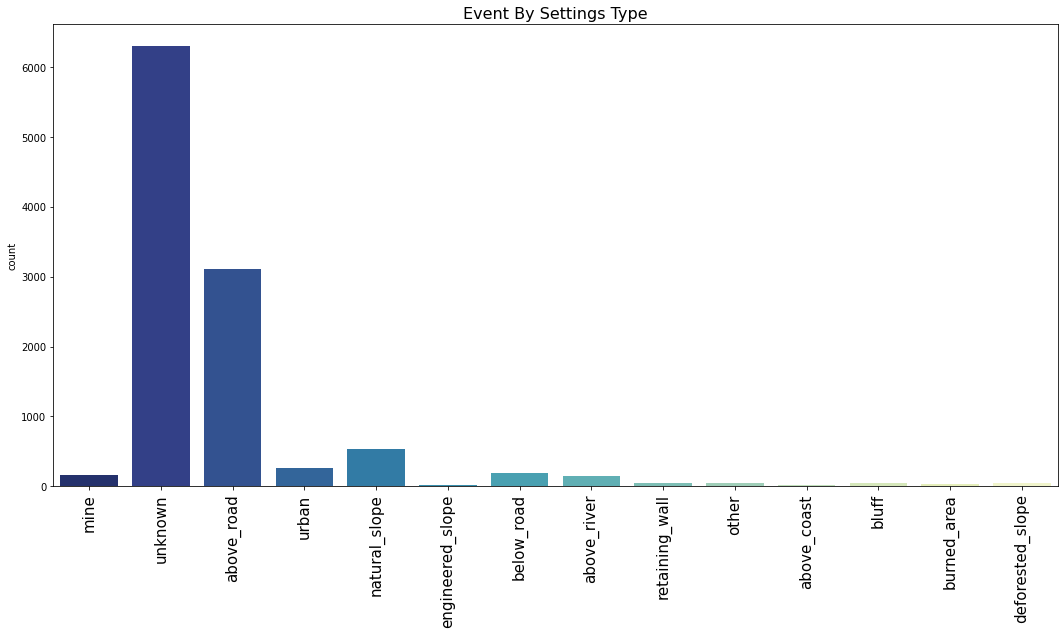

In [ ]:
def event_by_setting():

  #print value count
  print(df['landslide_setting'].value_counts()) 

  #print in countplot graph
  plt.figure(figsize=(18,8.5))
  sns.countplot(df['landslide_setting'],palette='YlGnBu_r')
  plt.xticks(rotation='vertical',size=15)
  plt.title('Event By Settings Type',size=16)
  plt.xlabel('',size=10)
  plt.show()


event_by_setting()

> ## *Accoring to above map we can determine lots of events happend in above Roads setting. so roads contructions cause to these events most. if we can contruct roads with more safety & pre analysis we can reduce these events happening*

## **By Event TrigGed Type**

downpour                   4680
rain                       2592
unknown                    1691
continuous_rain             748
tropical_cyclone            561
snowfall_snowmelt           135
monsoon                     129
mining                       93
earthquake                   89
construction                 82
flooding                     75
no_apparent_trigger          44
freeze_thaw                  41
other                        26
dam_embankment_collapse      12
leaking_pipe                 10
vibration                     1
volcano                       1
Name: landslide_trigger, dtype: int64


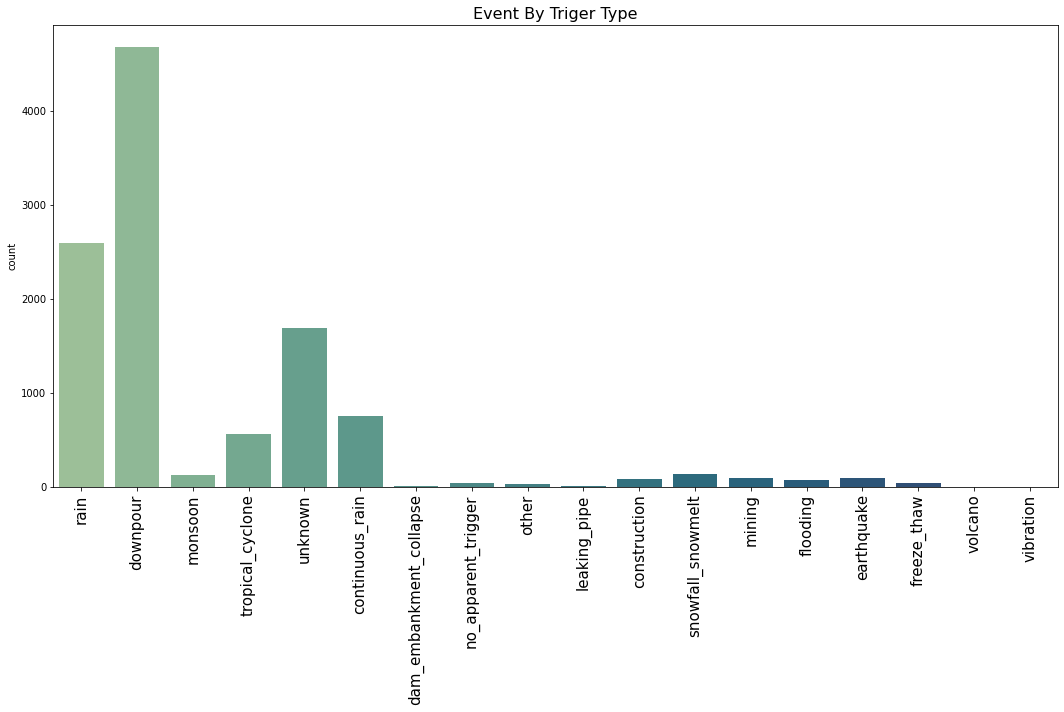

In [ ]:
def event_by_triger():

  #print value count
  print(df['landslide_trigger'].value_counts()) 

  #print in countplot graph
  plt.figure(figsize=(18,8.5))
  sns.countplot(df['landslide_trigger'],palette='crest')
  plt.xticks(rotation='vertical',size=15)
  plt.title('Event By Triger Type',size=16)
  plt.xlabel('',size=10)
  plt.show()


event_by_triger()

## **Events Occurred Due To Earth Quakes**

In [ ]:
size_eth = pd.DataFrame(df[(df['landslide_trigger'] == 'earthquake')])
size_eth

source_name  ... month
299                     CBS News  ...     6
348    Bluefield Daily Telegraph  ...     5
658                          gns  ...     1
757                     NBC News  ...     4
767                       Nation  ...    10
...                          ...  ...   ...
10367            Manila Bulletin  ...     7
10524                    Rappler  ...     7
10694           Malaysian Digest  ...     4
10781            GMA News Online  ...     4
10888             SunStar Manila  ...     4

[89 rows x 21 columns]

## **Number Of Earth Quakes Events**

In [ ]:
size_eth.size

1869

## **Earth Quakes Triggerd Types**

unknown             34
above_road          23
natural_slope       22
above_river          4
urban                2
deforested_slope     1
retaining_wall       1
mine                 1
below_road           1
Name: landslide_setting, dtype: int64


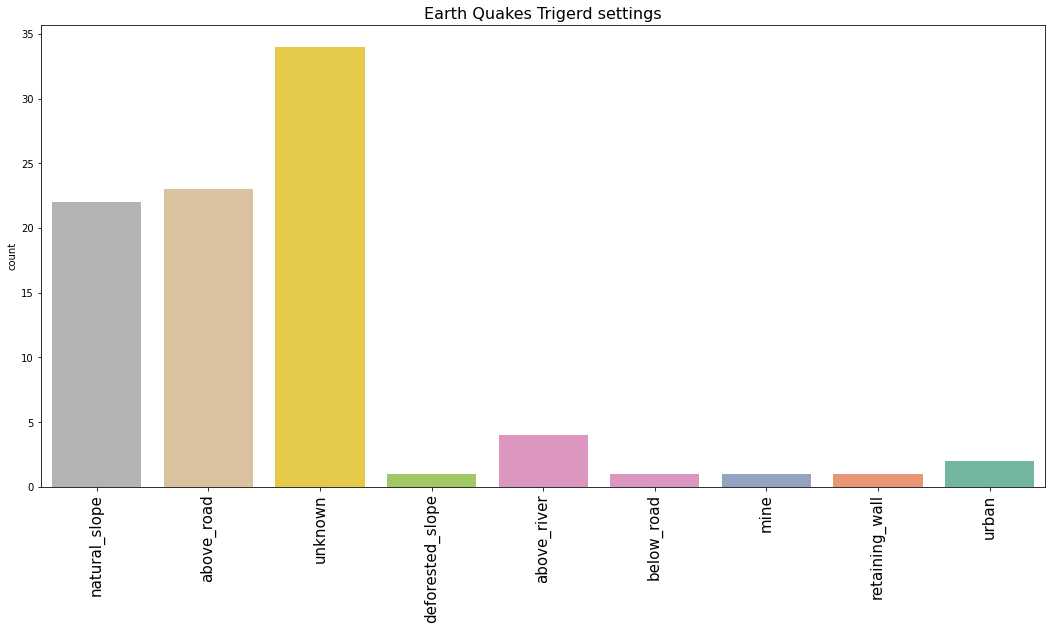

In [ ]:
def earth_quake_setting():

  #print value count
  print(size_eth['landslide_setting'].value_counts()) 

  #print in countplot graph
  plt.figure(figsize=(18,8.5))
  sns.countplot(size_eth['landslide_setting'],palette='Set2_r')
  plt.xticks(rotation='vertical',size=15)
  plt.title('Earth Quakes Trigerd settings',size=16)
  plt.xlabel('',size=10)
  plt.show()


earth_quake_setting()

### *According to the above graph there are unknow details there are high numbers in "above road" & "natural slope"*

### Earth Quakes Events Geospatial Visulization

In [ ]:
map_6 = folium.Map(location=[51.1657,10.4515], zoom_start=2) 

# List comprehension to make out list of lists
heat_data5 = [[row['latitude'],row['longitude']] for index, row in size_eth.iterrows()]

# Plot it on the map
HeatMap(heat_data5).add_to(map_6)

# Display the map
map_6

> ### *Accoring to the above map we can see these Earthquakes are trigerd near to earth plates & lots of number os earth quakes are happend with unknown reason. we can determine this unknown reasion as earth plates movements because these events happend between them. So **earth plates** are course to trigger Earthquakes most*

## **Top 10 Countries By Events**

In [ ]:
df['country_name'].value_counts().head(10)

United States     2992
India             1265
Philippines        675
Nepal              481
China              426
Indonesia          355
United Kingdom     229
Brazil             214
Canada             174
Malaysia           171
Name: country_name, dtype: int64

# **Fatalities & Injuries**

## **Highet Fatalities Event Details**

In [ ]:
df[(df['fatality_count'] == df['fatality_count'].max())]

source_name  ... month
5694  blogs.agu.org  ...     6

[1 rows x 21 columns]

## **Highest injuries Event Details**


In [ ]:
df[(df['injury_count'] == df['injury_count'].max())]

source_name  ... month
9097   Euro News  ...     8

[1 rows x 21 columns]

## **Fatalities & Injuries Descriptive Statistics**

In [ ]:
df[['fatality_count','injury_count']].describe()

fatality_count  injury_count
count     9648.000000   5359.000000
mean         3.219424      0.751819
std         59.886178      8.458955
min          0.000000      0.000000
25%          0.000000      0.000000
50%          0.000000      0.000000
75%          1.000000      0.000000
max       5000.000000    374.000000

## **Top 15 Countries With Events Fatalities & Injuries**

In [ ]:
group_by_country = pd.DataFrame(df.groupby('country_name').sum()[['fatality_count','injury_count']].reset_index())

group_by_country_sort = group_by_country.sort_values('fatality_count',ascending=False)
group_by_country_sort.head(15)

country_name  fatality_count  injury_count
56             India          7069.0         217.0
26             China          4945.0         318.0
0        Afghanistan          2294.0           1.0
98       Philippines          1847.0         138.0
17            Brazil          1743.0         103.0
57         Indonesia          1697.0         149.0
86             Nepal          1473.0         277.0
50         Guatemala           743.0         408.0
93          Pakistan           662.0          70.0
27          Colombia           591.0          84.0
123           Taiwan           540.0          19.0
130           Uganda           534.0          70.0
84   Myanmar [Burma]           498.0         228.0
10        Bangladesh           426.0         170.0
138          Vietnam           375.0          20.0

## **Fatalities & Injuries By Each Triger Type**

In [ ]:
group_by_tr = pd.DataFrame(df.groupby('landslide_category').sum()[['fatality_count','injury_count']].reset_index())

group_by_tr_sort = group_by_tr.sort_values('fatality_count',ascending=False)
group_by_tr_sort

landslide_category  fatality_count  injury_count
5             landslide         16912.0        2703.0
2           debris_flow          5770.0         407.0
6              mudslide          5624.0         404.0
0               complex          2139.0          37.0
9             rock_fall           319.0         292.0
10       snow_avalanche           112.0          36.0
13              unknown            74.0          99.0
7                 other            58.0          37.0
12  translational_slide            27.0           1.0
4                 lahar            12.0           0.0
8    riverbank_collapse             7.0           8.0
3            earth_flow             5.0           3.0
1                 creep             0.0           0.0
11               topple             0.0           0.0

<function matplotlib.pyplot.show>

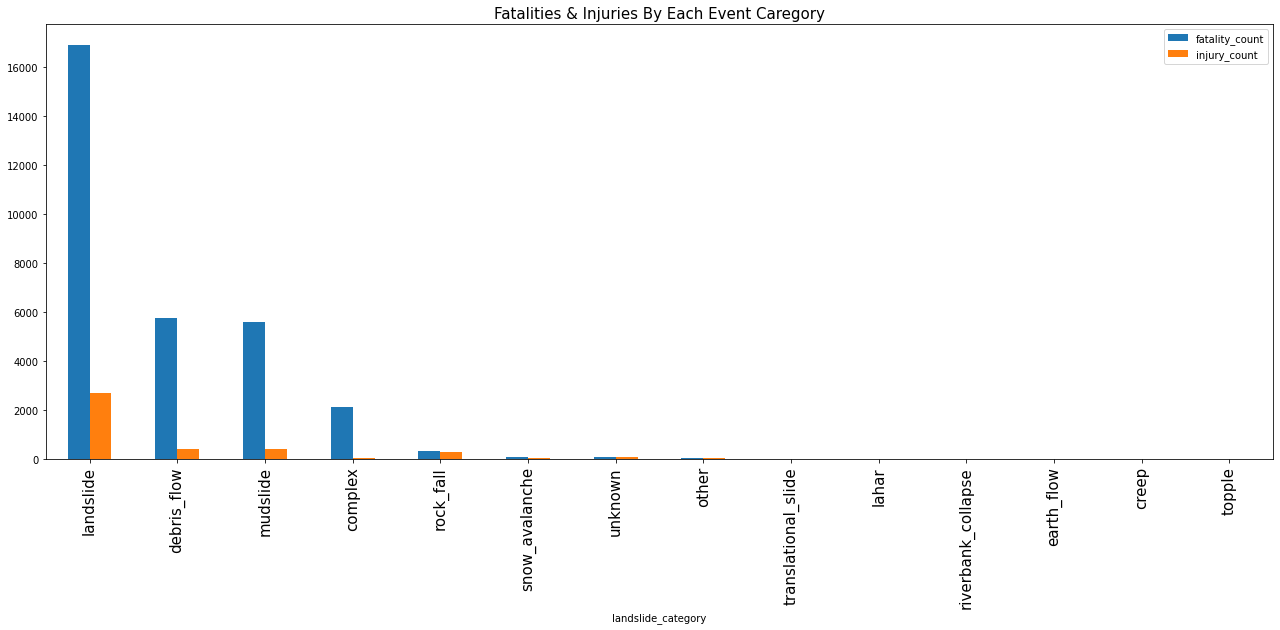

In [ ]:
group_by_tr_sort.plot(x="landslide_category", y=["fatality_count", "injury_count"], kind="bar",figsize=(22,8))
plt.xticks(rotation='vertical',size=15)
plt.title('Fatalities & Injuries By Each Event Caregory',size=15)
plt.show

---

## **Event Occured Due to Storms**

In [ ]:
storms = pd.DataFrame(df[df['storm_name'].notnull()])
storms

source_name  ... month
4             The Freeman  ...    10
7          Crónica Diaria  ...     9
61            The Freeman  ...    10
63            The Freeman  ...    10
64            The Freeman  ...    10
...                   ...  ...   ...
10877       The Telegraph  ...     2
10904            NBC News  ...     7
10939  The Daily Examiner  ...     4
10976            NBC News  ...     7
11003  The Times of India  ...    12

[577 rows x 21 columns]

### **Storms Events Geospatial Visualzation**

In [ ]:
map_7 = folium.Map(location=[51.1657,10.4515], tiles='Stamen Toner', zoom_start=2) 

# List comprehension to make out list of lists
heat_data6 = [[row['latitude'],row['longitude']] for index, row in storms.iterrows()]

# Plot it on the map
HeatMap(heat_data6).add_to(map_7)

# Display the map
map_7

## **Top 10 Storms Course to Occured Events**

In [ ]:
df['storm_name'].value_counts().head(10)

Supertyphoon Juan (Megi)      32
Tropical Depression Parma     23
Agaton                        20
Tropical Depression Urduja    15
Tropical Storm Tomas          14
Hurricane Tomas               13
Tropical Cyclone Agatha       12
Trami                         12
Lawin                         10
Utor                          10
Name: storm_name, dtype: int64

## **Fatalities & Injeries In Due To The Top 10 Occured Storms**

In [ ]:
storms = ['Supertyphoon Juan (Megi)','Tropical Depression Parma',
          'Agaton','Tropical Depression Urduja','Tropical Storm Tomas',          
          'Hurricane Tomas','Tropical Cyclone Agatha','Trami','Lawin','Utor']


storms_df = pd.DataFrame(df[(df['storm_name'] == storms[0]) | (df['storm_name'] == storms[1]) | (df['storm_name'] == storms[2]) | (df['storm_name'] == storms[3]) | (df['storm_name'] == storms[4]) | (df['storm_name'] == storms[5]) | (df['storm_name'] == storms[6]) | (df['storm_name'] == storms[7]) | (df['storm_name'] == storms[8]) | (df['storm_name'] == storms[9])])
storms_df

source_name  ... month
4           The Freeman  ...    10
61          The Freeman  ...    10
63          The Freeman  ...    10
64          The Freeman  ...    10
472         Interaksyon  ...     1
...                 ...  ...   ...
9648  newsinfo.inquirer  ...    10
9750     Panahon Ngayon  ...     1
9783         newsday.tt  ...    10
9853    news.pia.gov.ph  ...     8
9939       Inquirer.net  ...     1

[161 rows x 21 columns]

In [ ]:
# Create the map
map_8 = folium.Map(location=[51.1657,10.4515], tiles='cartodbpositron', zoom_start=3) 


mc2 = MarkerCluster()

for idx, row in storms_df.iterrows(): 

     if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):

        mc2.add_child(Marker(location=[row['latitude'], row['longitude']],tooltip=row['storm_name']))

#add child to the map                                     
map_8.add_child(mc2)

# Display the map
map_8

#### **Alternative Visulization In Heat Map For Better View**

In [ ]:
map_9 = folium.Map(location=[51.1657,10.4515], tiles='Stamen Toner', zoom_start=3) 

# List comprehension to make out list of lists
heat_data7 = [[row['latitude'],row['longitude']] for index, row in storms_df.iterrows()]

# Plot it on the map
HeatMap(heat_data7).add_to(map_9)

# Display the map
map_9

### *Most Event Occurred Due To Storms In Around Philiphines & Carabian Sea*

## **Fatalities & Injuries Due To Top 10 Storms**

#### **Total Fatalities & Injuries Due To Top 10 Storms**

In [ ]:
group_by_storms_df = pd.DataFrame(storms_df.groupby('storm_name').sum()[['fatality_count','injury_count']].reset_index())

group_by_storms_df_sort = group_by_storms_df.sort_values('fatality_count',ascending=False)
group_by_storms_df_sort

storm_name  fatality_count  injury_count
6   Tropical Depression Parma           332.0           0.0
5     Tropical Cyclone Agatha            68.0           0.0
0                      Agaton            56.0          10.0
8        Tropical Storm Tomas            26.0           0.0
9                        Utor            11.0           4.0
2                       Lawin             8.0           0.0
1             Hurricane Tomas             4.0           0.0
4                       Trami             3.0           0.0
7  Tropical Depression Urduja             3.0           0.0
3    Supertyphoon Juan (Megi)             1.0           0.0

### **Average Fatalities & Injuries Due To Top 10 Storms**

In [ ]:
group_by_storms_df_avg = pd.DataFrame(storms_df.groupby('storm_name').mean()[['fatality_count','injury_count']].reset_index())

group_by_storms_df_avg_sort = group_by_storms_df_avg.sort_values('fatality_count',ascending=False)
group_by_storms_df_avg_sort

storm_name  fatality_count  injury_count
6   Tropical Depression Parma       14.434783           NaN
5     Tropical Cyclone Agatha        5.666667           NaN
0                      Agaton        2.800000           0.5
8        Tropical Storm Tomas        1.857143           NaN
9                        Utor        1.571429           4.0
4                       Trami        1.000000           NaN
2                       Lawin        0.800000           0.0
1             Hurricane Tomas        0.307692           NaN
7  Tropical Depression Urduja        0.200000           NaN
3    Supertyphoon Juan (Megi)        0.031250           NaN

## **Fatalities & Injuries By Years**

In [ ]:
#group values by years & aggregated by facilty & injuries count
group_by_years = pd.DataFrame(df.groupby('year').sum()[['fatality_count','injury_count']].reset_index())

#sort values to decending order
group_by_years_sort = group_by_years.sort_values('fatality_count',ascending=False)
group_by_years_sort

year  fatality_count  injury_count
16  2013          6361.0         405.0
13  2010          5328.0          51.0
17  2014          3868.0         800.0
11  2008          2288.0          93.0
18  2015          2267.0        1027.0
14  2011          2146.0          36.0
20  2017          1897.0         642.0
12  2009          1792.0          12.0
10  2007          1734.0         156.0
19  2016          1491.0         779.0
15  2012          1462.0          28.0
9   2006           324.0           0.0
7   2004           100.0           0.0
8   2005             3.0           0.0
1   1993             0.0           0.0
6   2003             0.0           0.0
5   1998             0.0           0.0
4   1997             0.0           0.0
3   1996             0.0           0.0
2   1995             0.0           0.0
0   1988             0.0           0.0

## **Time Series Of Fatalities & Injuries**

Text(0.5, 1.0, 'Time Series Of Fatalities & Injuries ')

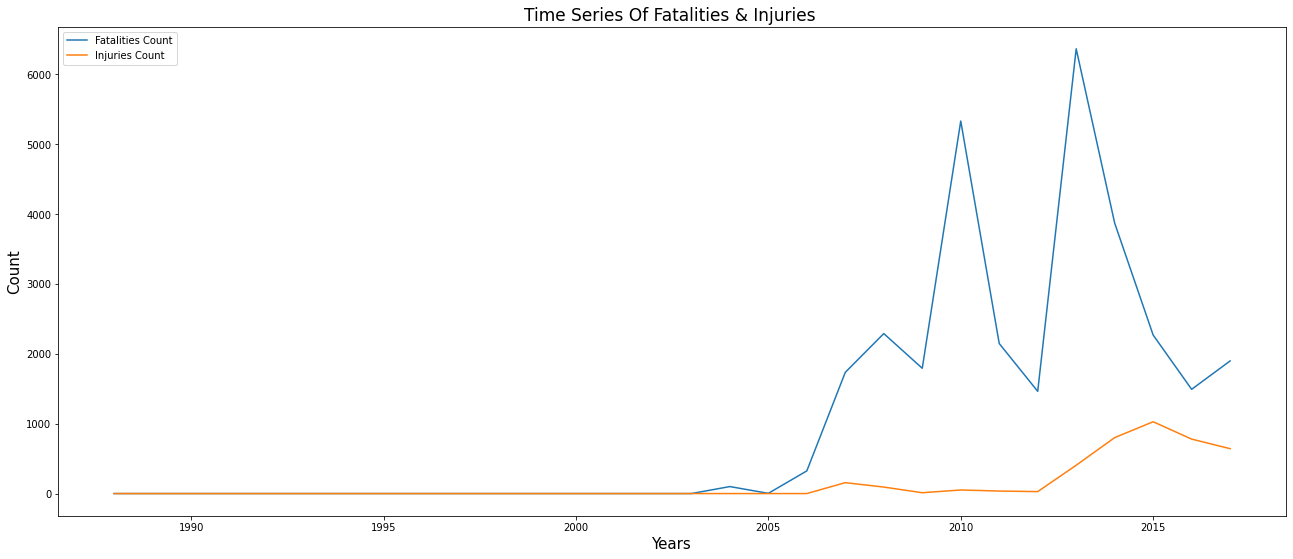

In [ ]:
# Visualize Fatalities & Injuries By Years
fig, ax = plt.subplots(1, 1, figsize=[22, 9])

ax.plot(group_by_years['year'], group_by_years['fatality_count'])
ax.plot(group_by_years['year'], group_by_years['injury_count'])

plt.xlabel('Years',size=15)
plt.ylabel('Count',size=15)

plt.legend(['Fatalities Count','Injuries Count'], loc=2)
ax.set_title('Time Series Of Fatalities & Injuries ',size=17)

## **Time Series Of Fatalities & Injuries Vs Occurred Events By Years**

Text(0.5, 1.0, 'Time Series Of Fatalities & Injuries Vs Occured Events By Years')

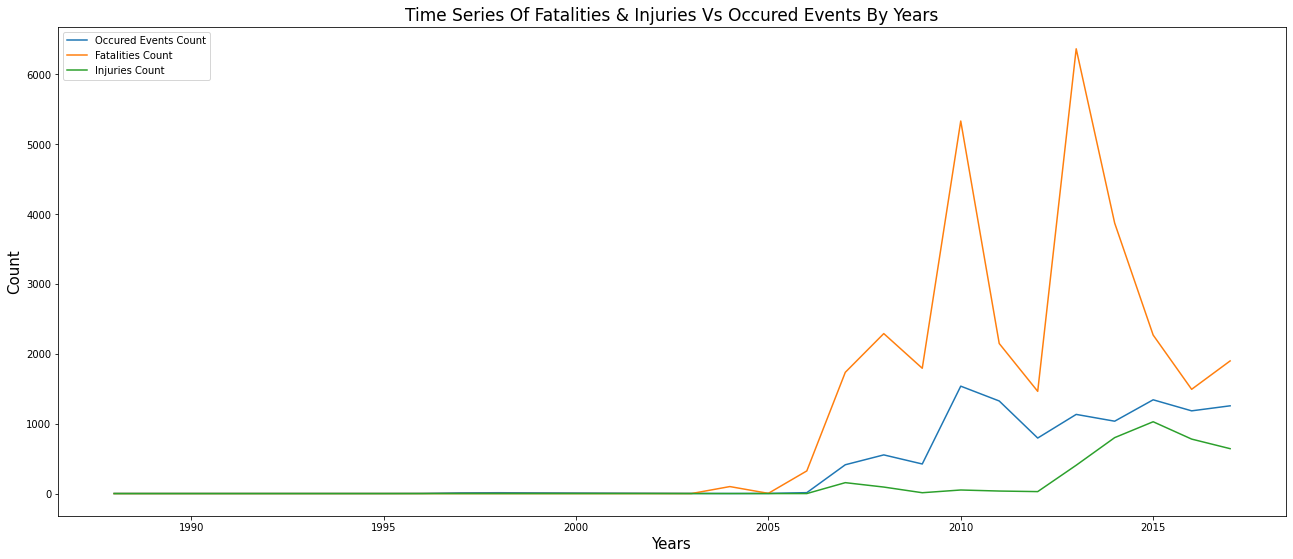

In [ ]:
# Visualize Fatalities & Injuries By Years
fig, ax = plt.subplots(1, 1, figsize=[22, 9])

ax.plot(gr_by_years['year'], gr_by_years['Occured_Events'])
ax.plot(group_by_years['year'], group_by_years['fatality_count'])
ax.plot(group_by_years['year'], group_by_years['injury_count'])

plt.xlabel('Years',size=15)
plt.ylabel('Count',size=15)

plt.legend(['Occured Events Count','Fatalities Count','Injuries Count'], loc=2)
ax.set_title('Time Series Of Fatalities & Injuries Vs Occured Events By Years',size=17)

---

# **Exploratory Data Analysis & Visualization In Sri Lanka**

In [ ]:
srilanka_df = pd.DataFrame(df[(df['longitude'] < 82.0000) & (df['latitude'] < 8.0000) & (df['latitude'] > 6.0000) & (df['longitude'] > 80.0000)])

In [ ]:
srilanka_df.head()

source_name  ... month
224   Sunday Times  ...     5
288  News Radio.lk  ...     5
308   Sunday Times  ...     5
344   Daily Mirror  ...     5
351  News Radio.lk  ...     5

[5 rows x 21 columns]

In [ ]:
srilanka_df.isnull().sum()

source_name                   0
source_link                   0
location_accuracy             0
landslide_category            0
landslide_trigger             0
landslide_size                0
landslide_setting             1
fatality_count               12
injury_count                 62
storm_name                   83
country_name                 11
admin_division_name          11
admin_division_population    11
gazeteer_closest_point       11
gazeteer_distance            11
longitude                     0
latitude                      0
Date                          0
Time                          0
year                          0
month                         0
dtype: int64

In [ ]:
srilanka_df.shape

(86, 21)

## *There Are **86** Events Occurred In Sri Lanka During 1988 To 2017*

---

## **Occured Events In Sri Lanka Geospatial Visualization**

In [ ]:
m11 = plugins.DualMap(location=(7.8731,80.7718), tiles=None, zoom_start=7.5)

folium.TileLayer("openstreetmap").add_to(m11.m1)
folium.TileLayer("Stamen Terrain").add_to(m11.m2)

# map 1.............................................................................................. 
mc15 = MarkerCluster()
for idx, row in srilanka_df.iterrows(): 

     if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):

        mc15.add_child(Marker(location=[row['latitude'], row['longitude']],tooltip="<b> Category : </b>"+ row['landslide_category']+"<br> <b> Trigger By : </b>" +row['landslide_trigger']+"<br> <b> Size : </b>" +row['landslide_size']))
# popup="<b> Category </b>"+ row['landslide_category']+"<br> <b> Trigger </b>" +row['landslide_trigger']+"<br> <b> Size </b>" +row['landslide_size']
#add child to the map                                     
m11.m1.add_child(mc15)

# map 2..............................................................................................

#List comprehension to make out list of lists
heat_data9 = [[row['latitude'],row['longitude']] for index, row in srilanka_df.iterrows()]
#Plot it on the map
HeatMap(heat_data9).add_to(m11.m2)


m11

> ## **Acording To The Above Map,**
- *We can See That In Sri Lanka Most Of The Events Mountain Side Areas. Such As Uva Province , Central province ,Sabaragamuwa Province*

## Lets Analyse These Events Deeply


---

## **Time Series Of Occurred Events By Years In Sri Lanka**

In [ ]:
#group by yeras
gr_by_years_sl = pd.DataFrame(srilanka_df.groupby('year')['source_name'].count().reset_index())

#change columns names
gr_by_years_sl.columns = ['year','Occured_Events']
gr_by_years_sl

year  Occured_Events
0  2007               4
1  2008               5
2  2010              10
3  2011              34
4  2012               2
5  2013               3
6  2014               8
7  2015               5
8  2016               6
9  2017               9

Text(0.5, 1.0, 'Event Occured Times By Years')

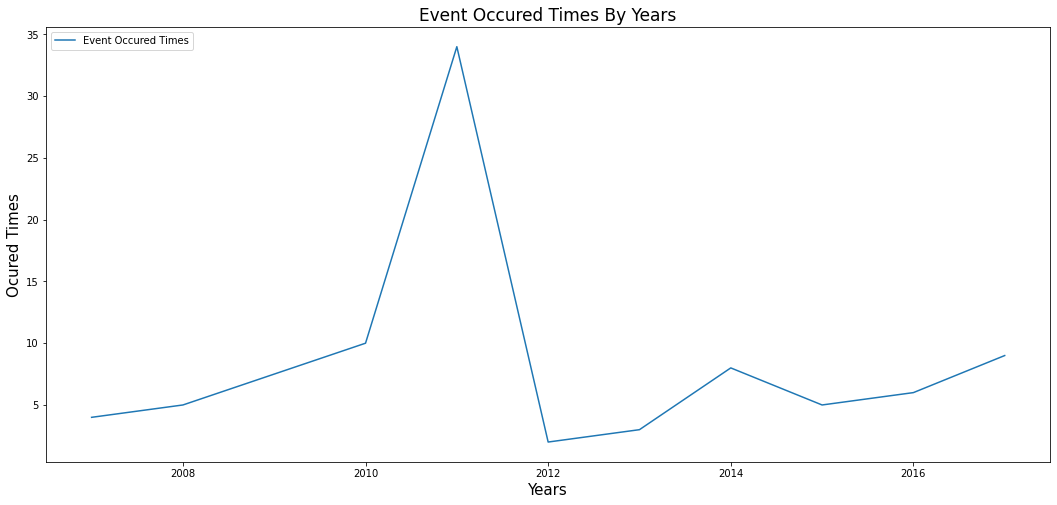

In [ ]:
# Visualize event occurred by Year

fig, ax = plt.subplots(1, 1, figsize=[18, 8])
ax.plot(gr_by_years_sl['year'], gr_by_years_sl['Occured_Events'])

plt.xlabel('Years',size=15)
plt.ylabel('Ocured Times',size=15)

plt.legend(['Event Occurred Times'], loc=2)
ax.set_title('Event Occurred Times By Years',size=17)

## **Time Series Of Ocured Events By Months In Sri Lanka**

In [ ]:
#group by months
gr_by_month_sl = pd.DataFrame(srilanka_df.groupby('month')['source_name'].count().reset_index())

#change columns names
gr_by_month_sl.columns = ['month','Occured_Events']
gr_by_month_sl

month  Occured_Events
0       1               9
1       2              21
2       3               2
3       4               9
4       5              20
5       6               2
6       8               1
7       9               3
8      10               4
9      11               6
10     12               9

Text(0.5, 1.0, 'Occured Events By Months')

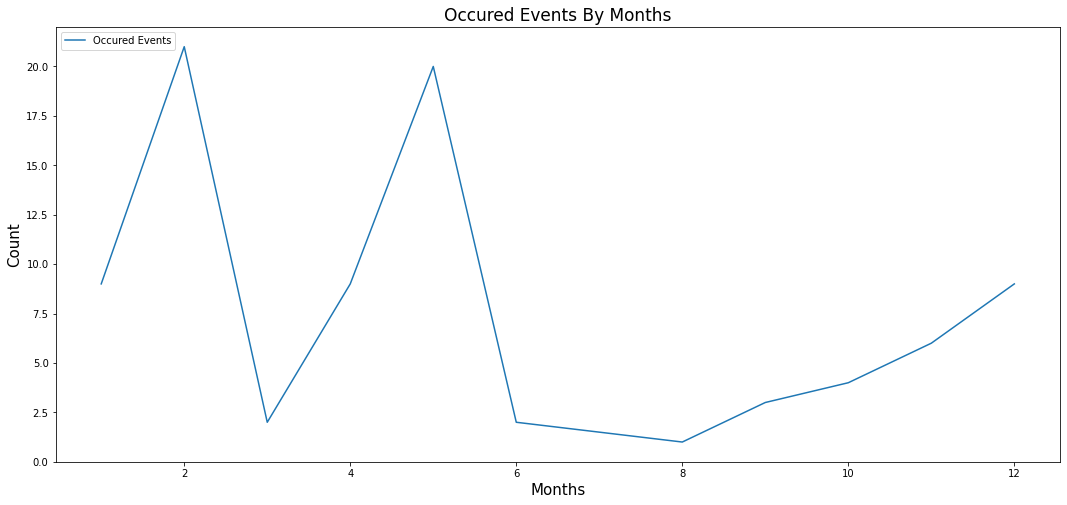

In [ ]:
# Visualize Event occured Count by months

fig, ax = plt.subplots(1, 1, figsize=[18, 8])
ax.plot(gr_by_month_sl['month'], gr_by_month_sl['Occured_Events'])

plt.xlabel('Months',size=15)
plt.ylabel('Count',size=15)

plt.legend(['Occurred Events'], loc=2)
ax.set_title('Occurred Events By Months',size=17)

## **Time Series Of Fatalities & Injuries Comparing To Events Occurred Times In Sri Lanka**

In [ ]:
#group values by years & aggregated by facilty & injuries count In Sri Lanka
gr_by_ft_in_sl_yr = pd.DataFrame(srilanka_df.groupby('year').sum()[['fatality_count','injury_count']].reset_index())

#sort values to decending order
gr_by_ft_in_sl_yr_sort = gr_by_ft_in_sl_yr.sort_values('fatality_count',ascending=False)
gr_by_ft_in_sl_yr_sort

year  fatality_count  injury_count
8  2016           116.0           2.0
9  2017           110.0           0.0
6  2014            59.0           1.0
7  2015            17.0           1.0
3  2011            14.0           0.0
1  2008            13.0           0.0
4  2012             6.0           0.0
2  2010             3.0           0.0
0  2007             2.0           0.0
5  2013             1.0           0.0

Text(0.5, 1.0, 'Time Series Of Fatalities & Injuries Vs Occured Events By Years In Sri Lanka')

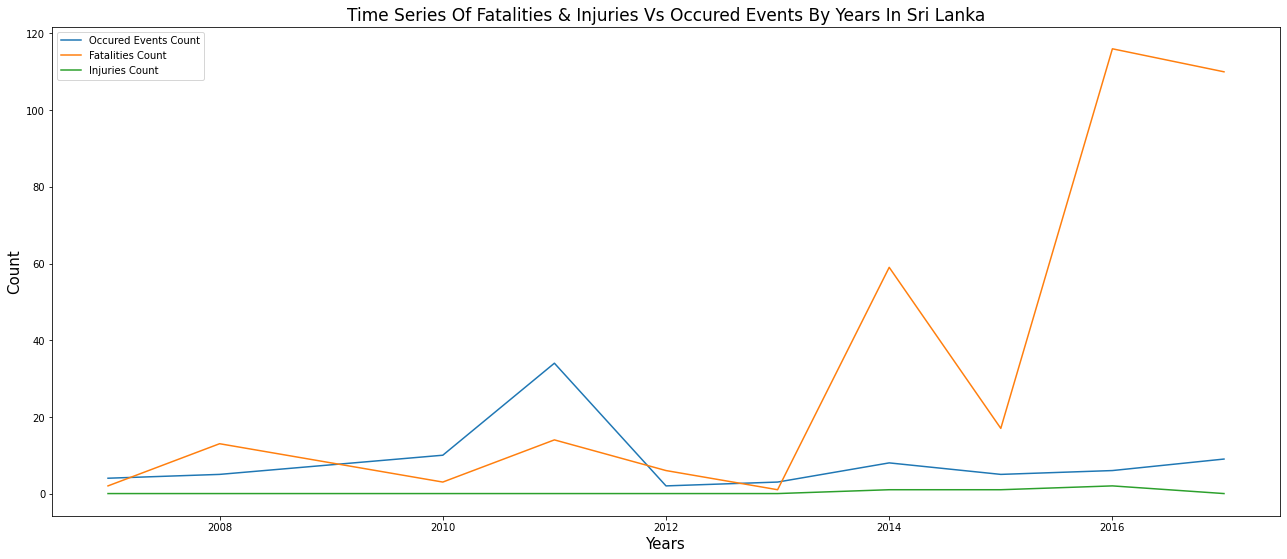

In [ ]:
# Visualize Fatalities & Injuries By Years
fig, ax = plt.subplots(1, 1, figsize=[22, 9])

ax.plot(gr_by_years_sl['year'], gr_by_years_sl['Occured_Events'])
ax.plot(gr_by_ft_in_sl_yr['year'], gr_by_ft_in_sl_yr['fatality_count'])
ax.plot(gr_by_ft_in_sl_yr['year'], gr_by_ft_in_sl_yr['injury_count'])

plt.xlabel('Years',size=15)
plt.ylabel('Count',size=15)

plt.legend(['Occured Events Count','Fatalities Count','Injuries Count'], loc=2)
ax.set_title('Time Series Of Fatalities & Injuries Vs Occured Events By Years In Sri Lanka',size=17)

---

## **Details About Occurred Event With Highest Fatalities**

In [ ]:
high_ft = pd.DataFrame(srilanka_df[(srilanka_df['fatality_count'] == srilanka_df['fatality_count'].max())])
high_ft

source_name  ... month
3941  Al Jazeera  ...     5

[1 rows x 21 columns]

## *Sri Lanka Hit a Biggest Landslide Disaster In 2016 You Can Read The Article Here https://en.wikipedia.org/wiki/2016_Sri_Lankan_floods*

## **Top 10 Fatalities Events**

In [ ]:
sl_ft_sort = srilanka_df.sort_values('fatality_count',ascending=False)
sl_ft_sort.head(10)

source_name  ... month
3941               Al Jazeera  ...     5
381                   Reuters  ...     5
410                   Reuters  ...     5
5849                      Aol  ...    10
1668                      BBC  ...     5
308              Sunday Times  ...     5
9432                Hiru News  ...     6
3876              News.com.au  ...     9
4511  World Socialist Website  ...     9
4989          lankaeverything  ...     4

[10 rows x 21 columns]

## **Distribution Of Categories In Occurred Events In Sri Lanka**

landslide      74
rock_fall       4
mudslide        4
debris_flow     2
other           1
complex         1
Name: landslide_category, dtype: int64


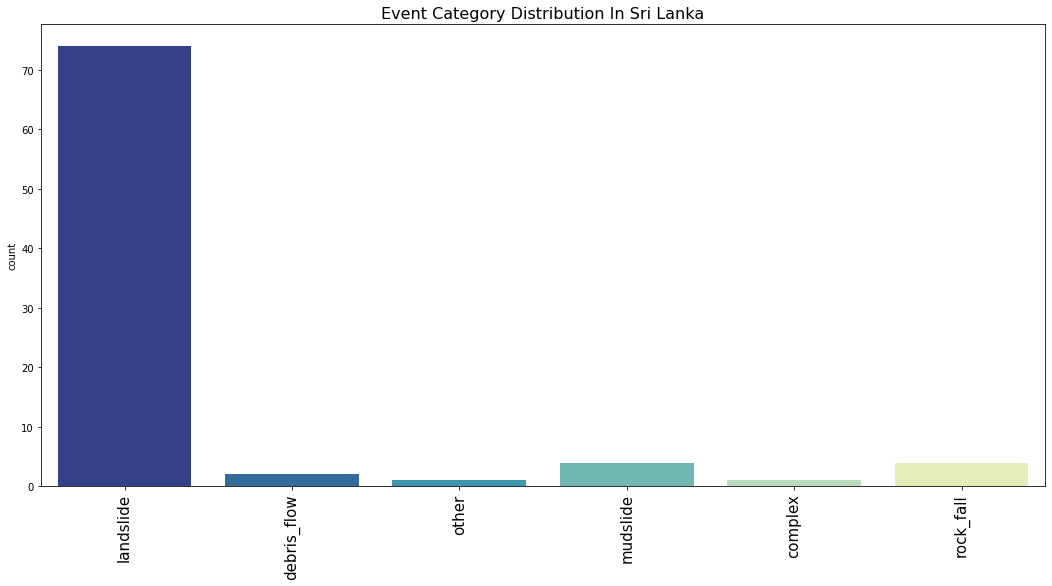

In [ ]:
def event_by_category_sl():

  #print value count
  print(srilanka_df['landslide_category'].value_counts()) 

  #print in countplot graph
  plt.figure(figsize=(18,8.5))
  sns.countplot(srilanka_df['landslide_category'],palette='YlGnBu_r')
  plt.xticks(rotation='vertical',size=15)
  plt.title('Event Category Distribution In Sri Lanka',size=16)
  plt.xlabel('',size=10)
  plt.show()


event_by_category_sl()

## **Distribution Of Triger Type In Occurred Events In Sri Lanka**

downpour            43
rain                15
continuous_rain     10
monsoon              9
tropical_cyclone     4
construction         3
unknown              2
Name: landslide_trigger, dtype: int64


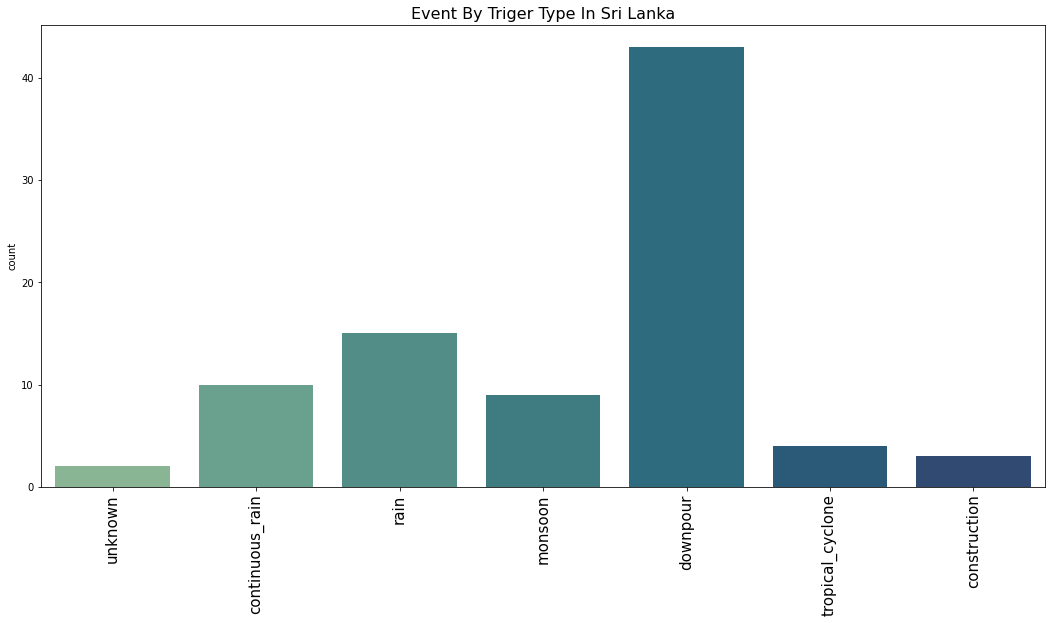

In [ ]:
def event_by_triger_sl():

  #print value count
  print(srilanka_df['landslide_trigger'].value_counts()) 

  #print in countplot graph
  plt.figure(figsize=(18,8.5))
  sns.countplot(srilanka_df['landslide_trigger'],palette='crest')
  plt.xticks(rotation='vertical',size=15)
  plt.title('Event By Triger Type In Sri Lanka',size=16)
  plt.xlabel('',size=10)
  plt.show()


event_by_triger_sl()

medium        73
large          6
small          6
very_large     1
Name: landslide_size, dtype: int64


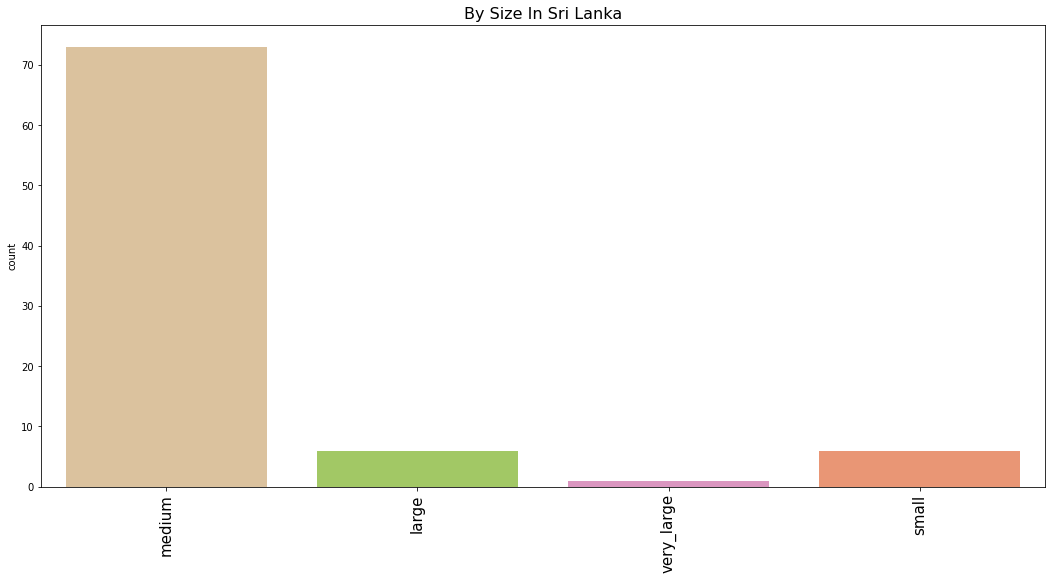

In [ ]:
def event_by_size_sl():

  #print value count
  print(srilanka_df['landslide_size'].value_counts()) 

  #print in countplot graph
  plt.figure(figsize=(18,8.5))
  sns.countplot(srilanka_df['landslide_size'],palette='Set2_r')
  plt.xticks(rotation='vertical',size=15)
  plt.title('By Size In Sri Lanka',size=16)
  plt.xlabel('',size=10)
  plt.show()


event_by_size_sl()

## **Event Reported Sources About In Sri Lanka**

In [ ]:
Reported_source_sl = pd.DataFrame(srilanka_df['source_name'].value_counts().head(15)).reset_index()
Reported_source_sl.columns = ['Source Name','Reported Count']
Reported_source_sl

Source Name  Reported Count
0   print.dailymirror              15
1            News 1st               4
2         dailymirror               4
3           Hiru News               4
4        Daily Mirror               3
5         sundaytimes               3
6         colombopage               3
7     Colombopage.com               2
8        Sunday Times               2
9          Daily News               2
10          reliefweb               2
11   www.dailynews.lk               2
12          dailynews               2
13      News Radio.lk               2
14     sundaytimes.lk               2

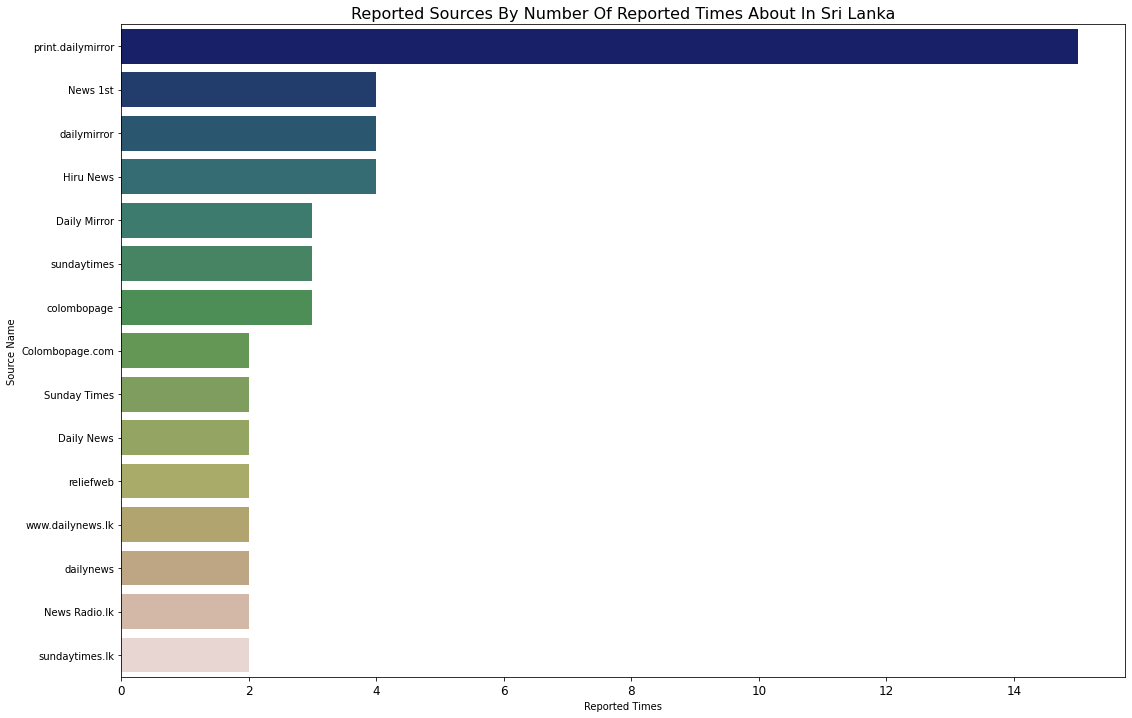

In [ ]:
# visualize source reported times About in Sri Lanka

plt.figure(figsize=(18,12))
sns.barplot(x="Reported Count", y="Source Name", 
            data=Reported_source_sl,
            palette="gist_earth")

plt.xticks(size=12)
plt.title('Reported Sources By Number Of Reported Times About In Sri Lanka',size=16)
plt.xlabel('Reported Times',size=10)
plt.show()

> ## *Print.Daily Mirror Has Did Good Job When Reporting Events*

In [ ]:
# export notbook file as HTML file

'''
%%shell
jupyter nbconvert --to html /content/Accomondations_In_Sri_Lanka.ipynb

'''